In [76]:
import pandas as pd

weather = pd.read_csv("weather.csv", index_col="DATE")
weather


,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
2000-01-01,NP000444540,"KATHMANDU AIRPORT, NP",NaN,51.0,70.0,35.0
2000-01-02,NP000444540,"KATHMANDU AIRPORT, NP",NaN,54.0,71.0,36.0
2000-01-03,NP000444540,"KATHMANDU AIRPORT, NP",NaN,53.0,71.0,35.0
2000-01-04,NP000444540,"KATHMANDU AIRPORT, NP",NaN,58.0,71.0,35.0
2000-01-05,NP000444540,"KATHMANDU AIRPORT, NP",NaN,56.0,71.0,35.0
...,...,...,...,...,...,...
2025-02-15,NP000444540,"KATHMANDU AIRPORT, NP",0.0,53.0,64.0,45.0
2025-02-16,NP000444540,"KATHMANDU AIRPORT, NP",0.0,55.0,69.0,45.0
2025-02-17,NP000444540,"KATHMANDU AIRPORT, NP",0.0,56.0,68.0,47.0


In [77]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.392688
TAVG       0.007487
TMAX       0.386199
TMIN       0.668705
dtype: float64

In [83]:
valid_columns = null_pct[null_pct < .05  ].index
valid_columns

Index(['STATION', 'NAME', 'TAVG'], dtype='object')

In [84]:
valid_columns = valid_columns.intersection(weather.columns)
weather = weather[valid_columns].copy()
weather.columns = weather.columns.str.lower()
weather

,station,name,tavg
DATE,,,
2000-01-01,NP000444540,"KATHMANDU AIRPORT, NP",51.0
2000-01-02,NP000444540,"KATHMANDU AIRPORT, NP",54.0
2000-01-03,NP000444540,"KATHMANDU AIRPORT, NP",53.0
2000-01-04,NP000444540,"KATHMANDU AIRPORT, NP",58.0
2000-01-05,NP000444540,"KATHMANDU AIRPORT, NP",56.0
...,...,...,...
2025-02-15,NP000444540,"KATHMANDU AIRPORT, NP",53.0
2025-02-16,NP000444540,"KATHMANDU AIRPORT, NP",55.0
2025-02-17,NP000444540,"KATHMANDU AIRPORT, NP",56.0


In [85]:
weather = weather.ffill()
weather.apply(pd.isnull).sum()

station    0
name       0
tavg       0
dtype: int64

In [86]:
weather.apply(lambda x: (x == 9999).sum())

station    0
name       0
tavg       0
dtype: int64

In [87]:
weather.dtypes

station     object
name        object
tavg       float64
dtype: object

In [88]:
weather.index

Index(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
       '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
       ...
       '2025-02-10', '2025-02-11', '2025-02-12', '2025-02-13', '2025-02-14',
       '2025-02-15', '2025-02-16', '2025-02-17', '2025-02-18', '2025-02-19'],
      dtype='object', name='DATE', length=8014)

In [89]:
weather.index = pd.to_datetime(weather.index)
weather.index.year.value_counts().sort_index()

DATE
2000    366
2001    360
2002    351
2003    363
2004    358
2005    352
2006    208
2007    195
2008    354
2009    348
2010    346
2011    363
2012    360
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    362
2022    365
2023    365
2024    356
2025     50
Name: count, dtype: int64

<Axes: xlabel='DATE'>

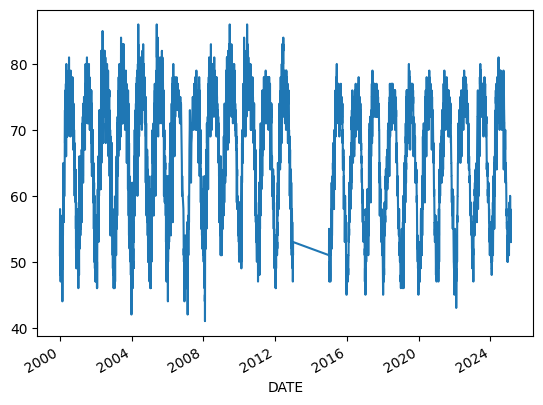

In [91]:
weather["tavg"].plot()

In [111]:
weather["target"] = weather["tavg"].shift(-1)
weather

,station,name,tavg,tmax,target
DATE,,,,,
2000-01-01,NP000444540,"KATHMANDU AIRPORT, NP",51.0,None,54.0
2000-01-02,NP000444540,"KATHMANDU AIRPORT, NP",54.0,None,53.0
2000-01-03,NP000444540,"KATHMANDU AIRPORT, NP",53.0,None,58.0
2000-01-04,NP000444540,"KATHMANDU AIRPORT, NP",58.0,None,56.0
2000-01-05,NP000444540,"KATHMANDU AIRPORT, NP",56.0,None,56.0
...,...,...,...,...,...
2025-02-15,NP000444540,"KATHMANDU AIRPORT, NP",53.0,None,55.0
2025-02-16,NP000444540,"KATHMANDU AIRPORT, NP",55.0,None,56.0
2025-02-17,NP000444540,"KATHMANDU AIRPORT, NP",56.0,None,56.0


In [112]:
weather=weather.ffill()
weather

,station,name,tavg,tmax,target
DATE,,,,,
2000-01-01,NP000444540,"KATHMANDU AIRPORT, NP",51.0,None,54.0
2000-01-02,NP000444540,"KATHMANDU AIRPORT, NP",54.0,None,53.0
2000-01-03,NP000444540,"KATHMANDU AIRPORT, NP",53.0,None,58.0
2000-01-04,NP000444540,"KATHMANDU AIRPORT, NP",58.0,None,56.0
2000-01-05,NP000444540,"KATHMANDU AIRPORT, NP",56.0,None,56.0
...,...,...,...,...,...
2025-02-15,NP000444540,"KATHMANDU AIRPORT, NP",53.0,None,55.0
2025-02-16,NP000444540,"KATHMANDU AIRPORT, NP",55.0,None,56.0
2025-02-17,NP000444540,"KATHMANDU AIRPORT, NP",56.0,None,56.0


In [ ]:
from sklearn.model_selection import Ridge
rr=Ridge(alpha=.1)

In [131]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station","tmax"])]
predictors

Index(['tavg'], dtype='object')

In [132]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)
predictions = backtest(weather, rr, predictors)
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

1.4842841236542403

In [133]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2024-03-19,55.0,65.055749,10.055749
2017-04-30,59.0,68.888534,9.888534
2011-03-12,61.0,70.767827,9.767827
2019-05-02,66.0,75.556794,9.556794
2021-02-21,60.0,50.721721,9.278279
...,...,...,...
2016-10-18,67.0,67.001519,0.001519
2016-01-19,50.0,50.000408,0.000408
2015-12-29,50.0,50.000408,0.000408


In [134]:
pd.Series(rr.coef_, index=predictors)

tavg    0.959728
dtype: float64

In [138]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        if col in weather.columns:
            weather = compute_rolling(weather, horizon, col)

In [140]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    if col in weather.columns:
        weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
        weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [141]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

1.4805592428745322

In [142]:
mean_squared_error(predictions["actual"], predictions["prediction"])

3.9627742939756416

In [146]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2024-03-19,55.0,65.055768,10.055768
2017-04-30,59.0,68.889605,9.889605
2011-03-12,61.0,70.769817,9.769817
2019-05-02,66.0,75.560782,9.560782
2021-02-21,60.0,50.719170,9.280830
...,...,...,...
2011-12-20,52.0,52.002197,0.002197
2012-02-01,52.0,52.002197,0.002197
2012-01-24,52.0,52.002197,0.002197


In [147]:
weather.loc["2020-03-07": "2020-03-17"]


,station,name,tavg,tmax,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_14_tmax,rolling_14_tmax_pct,month_avg_tmax,day_avg_tmax
DATE,,,,,,,,,,,
2020-03-07,NP000444540,"KATHMANDU AIRPORT, NP",51.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-08,NP000444540,"KATHMANDU AIRPORT, NP",55.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-09,NP000444540,"KATHMANDU AIRPORT, NP",59.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-10,NP000444540,"KATHMANDU AIRPORT, NP",61.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-11,NP000444540,"KATHMANDU AIRPORT, NP",61.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-12,NP000444540,"KATHMANDU AIRPORT, NP",63.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-13,NP000444540,"KATHMANDU AIRPORT, NP",55.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-14,NP000444540,"KATHMANDU AIRPORT, NP",54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-15,NP000444540,"KATHMANDU AIRPORT, NP",58.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='diff'>

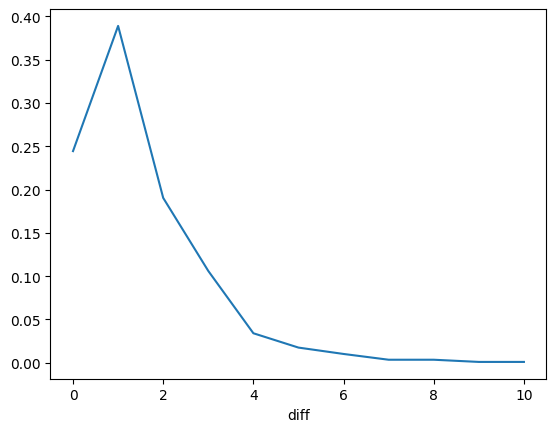

In [148]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [149]:
predictions

,actual,prediction,diff
DATE,,,
2011-03-07,65.0,67.012855,2.012855
2011-03-08,57.0,65.134374,8.134374
2011-03-09,61.0,57.620450,3.379550
2011-03-10,64.0,61.377412,2.622588
2011-03-11,71.0,64.195134,6.804866
...,...,...,...
2025-02-15,55.0,53.539553,1.460447
2025-02-16,56.0,55.458938,0.541062
2025-02-17,56.0,56.418631,0.418631
